# Familiarizándonos con el entorno de procesamiento de imágenes

## Autor: Ronie Martínez

#### Trabajo presentado como actividad propuesta para la asignatura "Percepción Computacional"

## Objetivos

El objetivo de esta actividad es familiarizarse con el procesamiento de imágenes y su representación.

## Descripción

Se van a indicar las tareas a realizar de una forma general, por lo que tendréis la posibilidad de implementar dicha tarea como creáis más conveniente, siendo la propia implementación el hecho a evaluar. Cuanto mejor se describa qué se hace y por qué, más se facilitará al profesorado la evaluación:

### Elaboración de un notebook básico de python donde se carguen los módulos de numpy y scikit image.

In [1]:
# Importamos las librerías necesarias
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

### Cargar una imagen de su disco duro. Dicha imagen puede ser a libre elección y sobre la que se realizarán el resto de tareas. Se recomienda que sea en escala de grises y que no posea un tamaño mayor de 500 x 500 píxeles.

**Nota:** Ya que no se especifica, voy a trabajar con valores normalizados de la imagen.

Dimensión de la imagen: 200 x 330


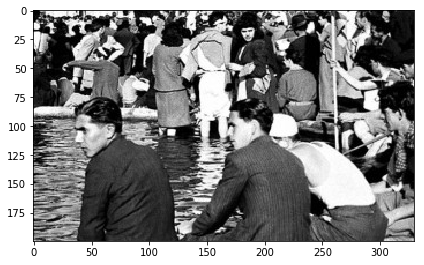

In [2]:
# Cargamos la imagen
img_gs = io.imread('FotoPrueba2.jpg', as_gray=True) # as_gray, Escala de Grises
# La imagen se guarda con valores normalizados (0 - 1 en lugar de 0 - 255)
# Guardamos los valores de filas y columnas que usaremos posteriormente
[rows, cols] = img_gs.shape
print("Dimensión de la imagen: "+str(rows)+" x "+str(cols))
# Mostramos la imagen
io.imshow(img_gs)
io.show()

### Obtener la distribución (histograma) y su representación de la suma de las componentes de la imagen de forma vertical y horizontal:
- Para ello, deberás sumar de forma vertical y horizontal todas las componentes de la imagen y almacenarlas en un vector unidimensional: un vector para la suma vertical y otro vector para la suma horizontal.

In [3]:
# Inicializamos las variables con el tamaño y tipo para la suma a realizar
sum_rows = np.zeros(rows, dtype=np.float64)
sum_cols = np.zeros(cols, dtype=np.float64)

# Inicializamos las variables para guardar el(los) valor(es) mínimo(s) y 
# máximo(s) y sus posiciones
aux_min = 1.0 # Auxiliar para detectar el valor mínimo
aux_max = 0.0 # Auxiliar para detectar el valor máximo
coord_max_x = np.array([], dtype=np.uint8)
coord_max_y = np.array([], dtype=np.uint8)
coord_min_x = np.array([], dtype=np.uint8)
coord_min_y = np.array([], dtype=np.uint8)

# Bucle para: (1) la suma de las componentes en vertical y horizontal y 
# (2) encontrar mínimo(s) y máximo(s) y coordenada(s)
for r in range (0, rows):
    for c in range (0, cols):
        # (1)
        sum_rows[r] = sum_rows[r] + img_gs[r,c]
        sum_cols[c] = sum_cols[c] + img_gs[r,c]
        
        # (2)
        if(img_gs[r,c] == aux_max):
            aux_max = img_gs[r,c]
            coord_max_x = np.append(coord_max_x, r)
            coord_max_y = np.append(coord_max_y, c)
        elif(img_gs[r,c] > aux_max):
            aux_max = img_gs[r,c]
            coord_max_x = np.array([], dtype=np.uint8)
            coord_max_y = np.array([], dtype=np.uint8)
            coord_max_x = np.append(coord_max_x, r)
            coord_max_y = np.append(coord_max_y, c)
        elif(img_gs[r,c] == aux_min):
            aux_min = img_gs[r,c]
            coord_min_x = np.append(coord_min_x, r)
            coord_min_y = np.append(coord_min_y, c)
        elif(img_gs[r,c] < aux_min): #else
            aux_min = img_gs[r,c]
            coord_min_x = np.array([], dtype=np.uint8)
            coord_min_y = np.array([], dtype=np.uint8)
            coord_min_x = np.append(coord_min_x, r)
            coord_min_y = np.append(coord_min_y, c)

#sum_rows = np.sum(img_gs,axis=1) #Función preexistente para la suma en filas
#sum_cols = np.sum(img_gs,axis=0) #Función preexistente para la suma en columnas

- Posteriormente, se deberá representar dichos vectores haciendo uso de una librería de visualización como matplotlib.

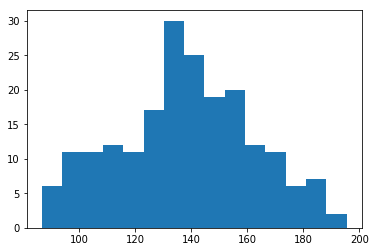

In [4]:
# función histograma para filas
plt.hist(sum_rows,bins=15) # bins: número de intervalos|divisiones
plt.show()

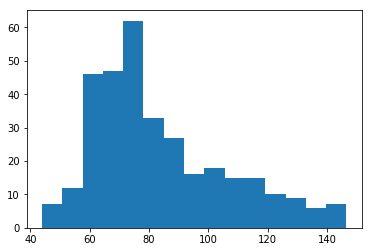

In [5]:
# función histograma para columnas
plt.hist(sum_cols,bins=15) # bins: número de intervalos|divisiones
plt.show()

Podemos presentar de otra manera los valores obtenidos de la sumatoria de filas y columnas

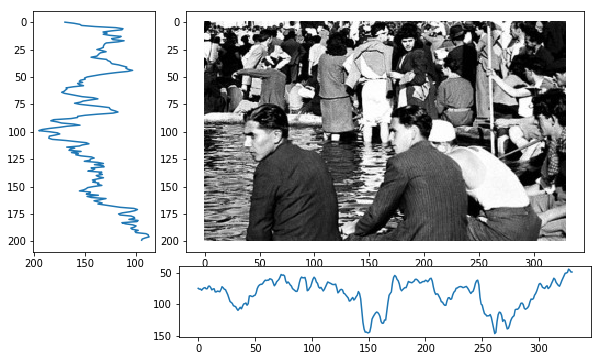

In [6]:
# Definimos el tamaño total del plot
fig = plt.figure(figsize=(10, 6))
# Distribución de los subplots
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_plt = fig.add_subplot(grid[:-1, 1:])
x_plt = fig.add_subplot(grid[-1, 1:], sharex=main_plt)
y_plt = fig.add_subplot(grid[:-1, 0], sharey=main_plt)

# Imagen principal
main_plt.imshow(img_gs, cmap=plt.cm.gray)

# Gráfica de sumatoria en columnas
x_plt.plot(sum_cols)
x_plt.invert_yaxis()

# Gráfica de sumatoria en filas
y_plt.plot(sum_rows, np.arange(rows))
y_plt.invert_xaxis()

# Los valores máximos se encuentran hacia el exterior, es decir, 
# hacia la izquiera y hacia abajo, respectivamente

- Obtener el valor máximo y mínimo de la imagen y su posición (coordenada (x,y)) dentro de la imagen.

In [7]:
# Hacemos uso de la parte (2) del bucle realizado anteriormente
coord_min = [coord_min_x[0], coord_min_y[0]]
coord_max = [coord_max_x[0], coord_max_y[0]]
valor_min = img_gs[coord_min_x[0], coord_min_y[0]]
valor_max = img_gs[coord_max_x[0], coord_max_y[0]]
print("Valor mínimo: "+str(valor_min)+". Coordenadas: "+ str(coord_min))
print("Valor máximo: "+str(valor_max)+". Coordenadas: "+ str(coord_max))

#Funciones preexistentes para encontrar máximo, mínimo y sus posiciones
#pos_maximo = np.argmax(img_gs)
#pos_minimo = np.argmin(img_gs)
#coord = np.unravel_index([pos_minimo, pos_maximo], img_gs.shape)
#coord_min = [coord[0][0],coord[1][0]]
#coord_max = [coord[0][1],coord[1][1]]
#valor_min = img_gs[coord[0][0],coord[1][0]]
#valor_max = img_gs[coord[0][1],coord[1][1]]

Valor mínimo: 0.0. Coordenadas: [0, 300]
Valor máximo: 1.0. Coordenadas: [0, 20]


En este caso, se escoge el primer valor que se haya encontrado, tanto para mínimo, como para máximo. Sin embargo, el algoritmo implementado en el bucle, guarda las posiciones de TODOS los mínimos y TODOS los máximos:

In [8]:
print("Cantidad de mínimos en la imagen: "+str(len(coord_min_x)))
print("Cantidad de máximos en la imagen: "+str(len(coord_max_x)))

Cantidad de mínimos en la imagen: 1898
Cantidad de máximos en la imagen: 554


### Para cada valor calculado anteriormente, pintar dentro de la imagen una cruz de 25 píxeles x 25 píxeles (Esa cruz deberá de ser como un + y no como una x). El centro de cada cruz, será el mínimo y el máximo. El color será blanco.
- Si la cruz no cupiera en los márgenes de la imagen (porque el mínimo/máximo estuviera muy escorado en el borde de la imagen, entonces se pintará el fragmento de cruz que quepa dentro de la imagen)

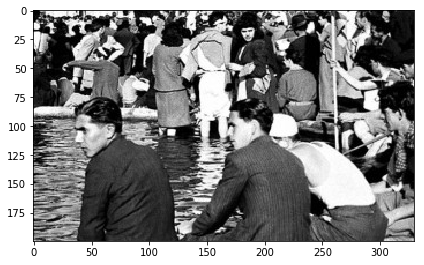

In [9]:
# imagen original
io.imshow(img_gs)
io.show()

Coordenada a pintar el mínimo: [0, 300]
Arr: 0. Aba: 13. Izq: 288. Der:313


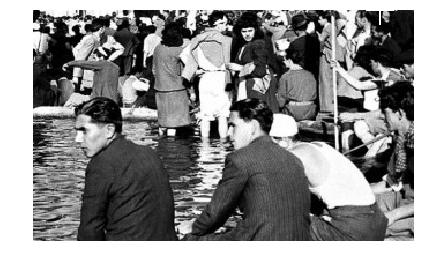

In [10]:
print("Coordenada a pintar el mínimo: "+str(coord_min))
# Realizamos una copia de la imagen original
test_img_gs_min = img_gs.copy()
cruz = 25 # tamaño de la cruz
lado_cruz = int(cruz/2)

c_arr = coord_min[0]-lado_cruz if coord_min[0] >= lado_cruz else 0
c_aba = coord_min[0]+lado_cruz+1 if coord_min[0] < rows-lado_cruz else rows 
# +1 No se incluye el final del rango
c_izq = coord_min[1]-lado_cruz if coord_min[1] >= lado_cruz else 0
c_der = coord_min[1]+lado_cruz+1 if coord_min[1] < cols-lado_cruz else cols 
# +1 No se incluye el final del rango

print("Arr: "+str(c_arr)+". Aba: "+str(c_aba)+
      ". Izq: "+str(c_izq)+". Der:"+str(c_der))

test_img_gs_min[c_arr:c_aba,coord_min[1]] = 1
test_img_gs_min[coord_min[0], c_izq:c_der] = 1

io.imshow(test_img_gs_min)
plt.axis('off')
io.show()

Coordenada a pintar el máximo: [0, 20]
Arr: 0. Aba: 13. Izq: 8. Der:33


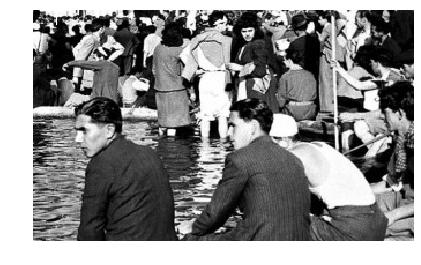

In [11]:
print("Coordenada a pintar el máximo: "+str(coord_max))
# Realizamos una copia de la imagen original
test_img_gs_max = img_gs.copy()
cruz = 25
lado_cruz = int(cruz/2)

c_arr2 = coord_max[0]-lado_cruz if coord_max[0] >= lado_cruz else 0
c_aba2 = coord_max[0]+lado_cruz+1 if coord_max[0] < rows else rows 
# +1 No se incluye el final del rango
c_izq2 = coord_max[1]-lado_cruz if coord_max[1] >= lado_cruz else 0
c_der2 = coord_max[1]+lado_cruz+1 if coord_max[1] < cols else cols 
# +1 No se incluye el final del rango

print("Arr: "+str(c_arr2)+". Aba: "+str(c_aba2)+". Izq: "
      +str(c_izq2)+". Der:"+str(c_der2))

test_img_gs_max[c_arr2:c_aba2,coord_max[1]] = 1
test_img_gs_max[coord_max[0], c_izq2:c_der2] = 1

io.imshow(test_img_gs_max)
plt.axis('off')
io.show()

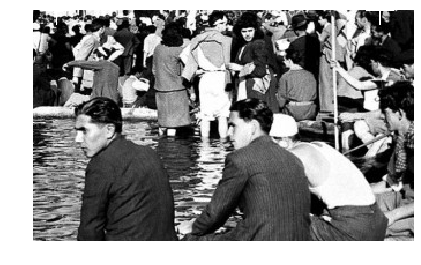

In [12]:
# Imprimimos ambas cruces (mínimo y máximo) en una nueva imagen
# Copiamos la editada con la cruz de mínimo
test_img_gs_ambos = test_img_gs_min.copy()
# Aumentamos la cruz de máximo
test_img_gs_ambos[c_arr2:c_aba2,coord_max[1]]=1
test_img_gs_ambos[coord_max[0], c_izq2:c_der2]=1

io.imshow(test_img_gs_ambos)
plt.axis('off')
io.show()

### Por último, se pide implementar un algoritmo que rote 180° una determinada imagen. No es necesario generalizar la rotación para cada ángulo, únicamente para 180°

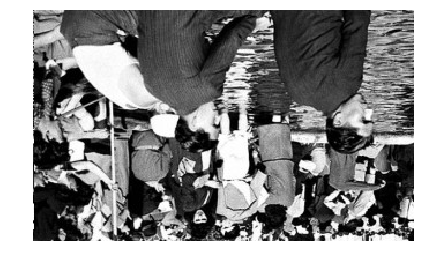

In [13]:
# Creamos una copia de la imagen
img_gs_rot = img_gs.copy()

# Hacemos un vector 1D a la foto|matriz 2D
img_gs_rot = img_gs_rot.reshape(1,rows*cols)
# Creamos una copia "auxiliar" 
img_gs_rot2 = img_gs_rot.copy()

# Bucle para intercambiar los valores del inicio 
# con los valores del final y viceversa
for i in range (0, img_gs_rot.shape[1]):
    img_gs_rot[0][i] = img_gs_rot2[0][-i]

# Volvemos a organizar en matriz 2D el vector con el que trabajamos 1D
img_gs_rot = img_gs_rot.reshape(rows, cols)

io.imshow(img_gs_rot)
plt.axis('off')
io.show()

 La imagen conserva las mismas propiedades que la original.